In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10


2025-07-08 18:11:33.253955: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-08 18:11:33.254026: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-08 18:11:33.336764: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-08 18:11:33.513681: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-08 18:11:34.769558: W tensorflow/compiler/tf2

In [2]:
import tarfile

# Replace with the path to your file
file_path = '/home/nikola/Documents/Assignment-9/cifar-10-python.tar.gz'

with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path='./cifar10_data')

In [3]:
import pickle
import numpy as np
import os

def load_cifar_batch(filename):
    with open(filename, 'rb') as f:
        batch = pickle.load(f, encoding='latin1')
        data = batch['data']
        labels = batch['labels']
        data = data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)  # Convert to (N,32,32,3)
        return data, np.array(labels)

# Load all training batches
x_train, y_train = [], []
for i in range(1, 6):
    data_batch, labels_batch = load_cifar_batch(f'./cifar10_data/cifar-10-batches-py/data_batch_{i}')
    x_train.append(data_batch)
    y_train.append(labels_batch)

x_train = np.concatenate(x_train)
y_train = np.concatenate(y_train)

# Load test batch
x_test, y_test = load_cifar_batch('./cifar10_data/cifar-10-batches-py/test_batch')

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = y_train.flatten()
y_test = y_test.flatten()

In [5]:
def build_encoder():
    encoder = models.Sequential([
        layers.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(2)  # 2D bottleneck
    ])
    return encoder


In [6]:
def build_decoder():
    decoder = models.Sequential([
        layers.Input(shape=(2,)),
        layers.Dense(8*8*128, activation='relu'),
        layers.Reshape((8, 8, 128)),
        layers.Conv2DTranspose(64, (3,3), strides=2, activation='relu', padding='same'),
        layers.Conv2DTranspose(32, (3,3), strides=2, activation='relu', padding='same'),
        layers.Conv2D(3, (3,3), activation='sigmoid', padding='same')
    ])
    return decoder


In [7]:
encoder = build_encoder()
decoder = build_decoder()

input_img = layers.Input(shape=(32, 32, 3))
encoded = encoder(input_img)
decoded = decoder(encoded)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 2)                 109634    
                                                                 
 sequential_1 (Sequential)   (None, 32, 32, 3)         117699    
                                                                 
Total params: 227333 (888.02 KB)
Trainable params: 227333 (888.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2025-07-08 18:11:38.865868: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-08 18:11:39.241544: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
history = autoencoder.fit(x_train, x_train,
                          epochs=20,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))


Epoch 1/20
196/196 [==============================] - 57s 286ms/step - loss: 0.0432 - val_loss: 0.0371
Epoch 2/20
196/196 [==============================] - 56s 285ms/step - loss: 0.0369 - val_loss: 0.0368
Epoch 3/20
196/196 [==============================] - 56s 284ms/step - loss: 0.0367 - val_loss: 0.0367
Epoch 4/20
196/196 [==============================] - 58s 298ms/step - loss: 0.0366 - val_loss: 0.0368
Epoch 5/20
196/196 [==============================] - 56s 286ms/step - loss: 0.0365 - val_loss: 0.0365
Epoch 6/20
196/196 [==============================] - 57s 289ms/step - loss: 0.0365 - val_loss: 0.0368
Epoch 7/20
196/196 [==============================] - 56s 287ms/step - loss: 0.0364 - val_loss: 0.0364
Epoch 8/20
196/196 [==============================] - 55s 282ms/step - loss: 0.0364 - val_loss: 0.0364
Epoch 9/20
196/196 [==============================] - 55s 282ms/step - loss: 0.0364 - val_loss: 0.0363
Epoch 10/20
196/196 [==============================] - 55s 281ms/step - l

313/313 [==============================] - 1s 4ms/step


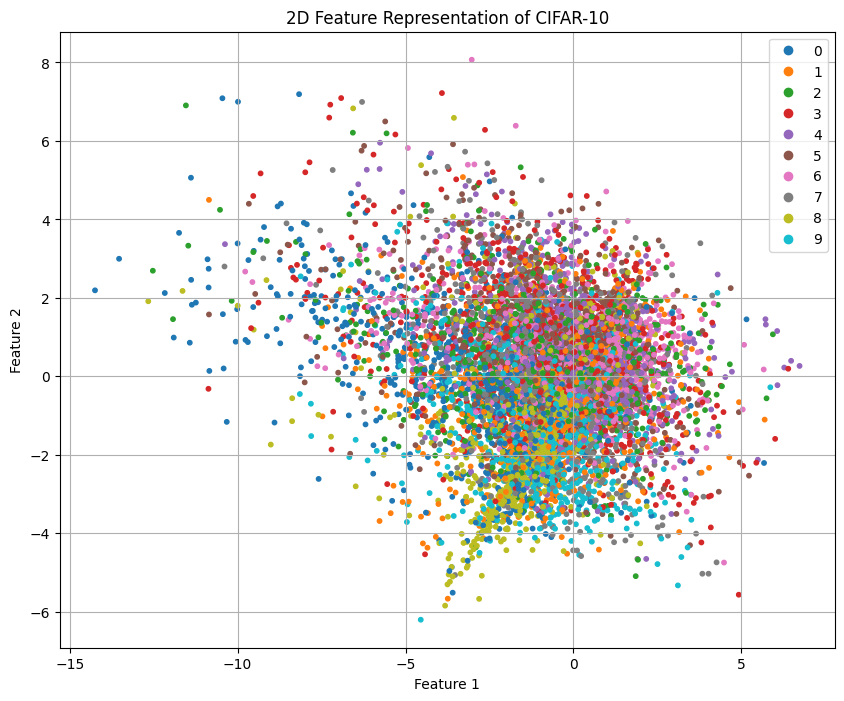

In [9]:
# Get 2D features
features = encoder.predict(x_test)

# Plot the features
plt.figure(figsize=(10,8))
scatter = plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='tab10', s=10)
plt.legend(handles=scatter.legend_elements()[0], labels=list(range(10)))
plt.title("2D Feature Representation of CIFAR-10")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


1/1 [==============================] - 0s 61ms/step


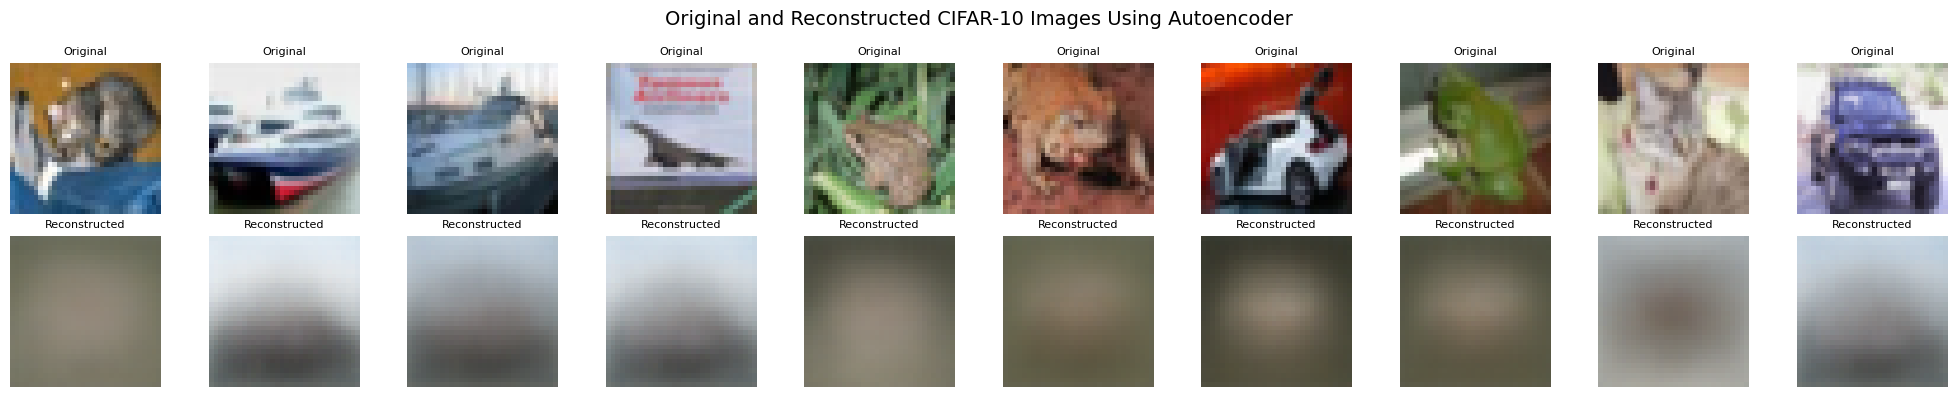

In [13]:
# Predict on test images using trained autoencoder
decoded_imgs = autoencoder.predict(x_test[:10])

# Plotting Original and Reconstructed Images
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
for i in range(10):
    # Original Image
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original", fontsize=8)
    plt.axis("off")

    # Reconstructed Image
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed", fontsize=8)
    plt.axis("off")

plt.suptitle("Original and Reconstructed CIFAR-10 Images Using Autoencoder", fontsize=14)
plt.tight_layout()
plt.show()
